### Regression Analysis

###### One dimensional Data (Unidimensional data)
Unidemensional data can be represented on a number line.
One dimensional data represents a single variable e.g. house prices

Unidimensional data is analysed using descriptive summary statistics such as measures of central tendency and measures of dispersion i.e. mean, median and standard deviation


###### Two dimensional Data (Bidimensional data)
It is often more insightful to view data in relation to some other data.
This allows you to visualize relationships
Bidimensional data can be represented on a plane e.g. the coordinate plane


### Linear Regression
In order to express the relationship that exist in this bidimensional data, you can draw a number of lines or curves to fit the data.
The objective of this lines and curves is to represent the relationship that exists between the value on the x-axis and that on the y-axis.
if we have a line, then that relationship is a linear relationship which can be positive or negative

Linear regression is the process of finding such a straight line that best fits the data to express the relationship that exists in that data.

Mathematically, a straight line can be expressed using a formular such as y = A + Bx. where A is the intercept and B is the slope of the line or the coefficient of the x variable.
The objective of linear regression is to find the values of A and B that best fits the data

Regression not only gives the equation of this line, but also signals how reliable the line is. This reliability is expressed using a measure called R-Squared(R2). This is expressed as a percentage or as a decimal in the range 0 - 1.

The higher the R-squared value the more reliable the line is i.e. the higher the quality of fit.

The R-Squared value tells us how much of the variance in the data is captured by the regression line

The 'best fit' line is the one where the sum of the squares of the lengths of the errors is minimized.

Finding this line is the objective of the regression problem.

### Multiple Regression

In simple regression you have data in 2-dimensions i.e. you only have one independent variable.

In multiple regression you have data in more than 2-dimensions i.e. you have more than one independent variable.

The risk with mutiple regression is multicollinearity; This is where the x variables contain the same information This can lead to less robust regression .

Multiple regression equation:

Y = C1 + C2X1+C3X2 + ... + CnXn-1


When working with multiple regression you should be dealing with uncorrelated x variables (explanatory variables)

Multicollinearity kills regression usefulness. If you x variables are highly correlated, the R-squared as well as the regression coefficients are not very reliable. This makes the regression model perform poorly with new data it has not encountered.

You therefore need to detect multicollinearity if it exists in your data and take corrective measures. You need to take a big picture of your data and set it right. You might also need to apply techniques such as factor analysis and principal component analysis (PCA) which involves re-orienting your original data along new axis so that you are able to extract latent factors from your correlated x variables.

##### R-squared and multiple regression
The R-squared is the most popular metric for evaluating regression models. Unfortunately this value increases with the addition of new x variables. This can lead to overfitting (model performing well in development and testing but performs poor in production).

In this regard, when performing multiple regression, you will use adjusted R-squared instead of the normal R-squared.

Adjusted R-squared = R-squared * (penalty for adding irrelevant variables)

Adjusted R-squared increases when irrelevant variables are deleted.

where: irrelevant variables = any group whose F-ratio < 1

### Performing simple linear Regression
We will use two techniques
1. Analytically by fitting the regression formular
2. Machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, scale
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

import statsmodels.api as sm

from sklearn.metrics import r2_score

In [2]:
# Getting the data
house = pd.read_csv('C:/Users/MANU/Desktop/Datasets/Pluralsight/house sales/kc_house_data.csv')

In [3]:
house.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Some columns such as 'id', 'lat', 'long', and 'zipcode' are irrelevant. we will remove them. 

In [5]:
house.drop(['id', 'lat', 'long', 'zipcode'], axis=1, inplace=True)

house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

Observations:
1. All the columns contain numeric data which is either integer or float
2. No missing values
3. The date column is of type 'object'. we need to convert to datetime

In [7]:
# Converting the date column to datetime
house['date'] = pd.to_datetime(house['date'])

# extracting the age of a house and setting it as a new column
house['house_age'] = house['date'].dt.year - house['yr_built']

#Deleting the date and year_built columns
house.drop(['date', 'yr_built'], axis=1, inplace=True)

house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,1800,7503,28


Lets setup a new column that will tell us if a house was renovated or not.

In [8]:
house['renovated'] = house['yr_renovated'].apply(lambda x:0 if x==0 else 1)

#deleting the yr_renovated column
house.drop('yr_renovated', axis=1, inplace=True)

Lets have a quick exploration of our dataset

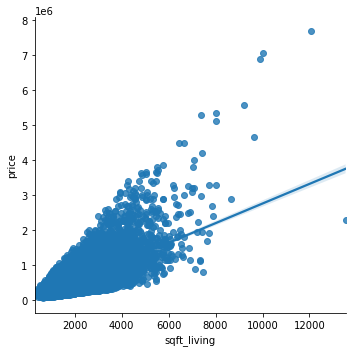

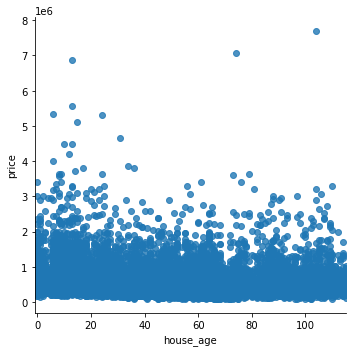

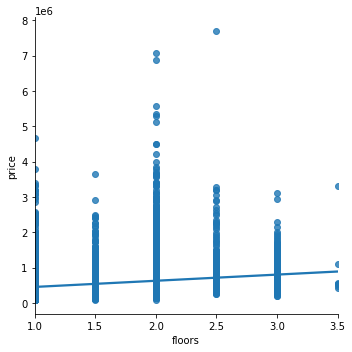

In [9]:
#Plotting a regression plot of sqft_living vs price
sns.lmplot('sqft_living', 'price', data=house)

#Plotting a regression plot of house_age vs price
sns.lmplot('house_age', 'price', data=house)

#Plotting a regression plot of floors vs price
sns.lmplot('floors', 'price', data=house)

plt.show()

Observations:
1. There is clear linear relationship between price and sqft_living
2. No linear relationship between price and house_age
3. No linear relationship between price and floors

Based on the above exploration, we will perform a simple linear regression using sqft_living as the only predictor of price

Before we perform regression, we need to split our data into training data and testing subset for machine learning

In [10]:
#predictor variable
x = house[['sqft_living']]

# target variable
y = house['price']

In [11]:
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [12]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

We will split the dataset we are working with into two parts

In [13]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2)

Machine learning models tend to be more robust when you standardize the data that you feed into the model

Let's standardize the training and test datasets

In [14]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)

###### 1. Simple linear regression with machine learning

In [15]:
# instantiating linear regression estimator object
linear_regression = LinearRegression()

# Training the linear regression model
reg_model = linear_regression.fit(x_train, y_train)

# Testing the trained linear regression model
y_pred = reg_model.predict(x_test)

Lets compare the predicted values againts the actuals from the test dataset

In [16]:
compare = pd.DataFrame({'test': y_test, 'predicted': y_pred})

compare.sample(10)

,test,predicted
1666,220000.0,628439.801973
21029,260000.0,573375.076745
6469,260000.0,437162.335389
3166,316000.0,689300.814069
8819,1005000.0,657421.236304
9204,1065000.0,567578.789878
2874,499000.0,370505.036428
13771,325000.0,611050.941375
15438,278226.0,642930.519139
6886,509500.0,547291.785847


Manually comparing as above does not really tell us how good our regression model is.

lets visualize a scatter alongside a line

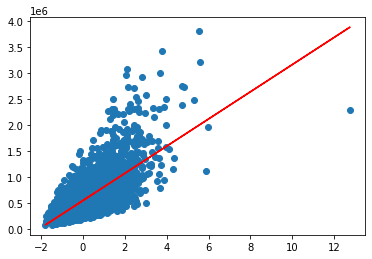

In [17]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.show()

The red line captures the underlying data well, but how well?. Only the R-squared score can tell us.

You can calculate the r-squared score on training data as well as the test data as follows:

In [18]:
print ('Training r-squared score: {}'.format(linear_regression.score(x_train, y_train)))

Training r-squared score: 0.49405833995112897


A better way to evaluate your model is to calculate the r-squared on test data

In [19]:
score = r2_score(y_test, y_pred)

print('Testing r-squared score: {}'.format(score))

Testing r-squared score: 0.4847547192871766


The r2 value on the training data is almost equal to the r2 value on the test data. This tells us that our model is fairly robust

We have one regression variable that is our predictor, lets take a look at the regression coefficient assigned to that variable and the intercept.

In [20]:
theta_o = linear_regression.coef_

theta_o

array([261583.47735131])

In [21]:
intercept = linear_regression.intercept_

intercept

541775.3243493349

Another visualization you can use to compare actual values vs. predicted values is to use a line plot as shon below

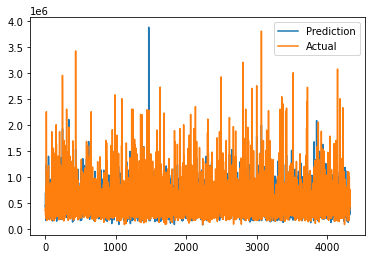

In [22]:
plt.plot(y_pred, label='Prediction')
plt.plot(y_test.values, label='Actual')
plt.legend()
plt.show()

The predicted and the actual seem to follow each other closely though its had to tell since we have so many samples in our test dataset

###### 2. Simple linear regression Analytically
We will fit our model on train data

In [23]:
x_train[:5]

array([[-0.01044859],
       [-0.74791312],
       [-0.83467366],
       [-0.74791312],
       [-0.53101179]])

We want to fit a regression model with intercept so will go ahead and add a constant on our training data as follows

In [24]:
x_train = sm.add_constant(x_train)

x_train[:5]

array([[ 1.        , -0.01044859],
       [ 1.        , -0.74791312],
       [ 1.        , -0.83467366],
       [ 1.        , -0.74791312],
       [ 1.        , -0.53101179]])

We can see that now  a training data contains a new column comprising of all ones. This represent the intercept in our regression.

You can perform Ordinary Least Squares (OLS) regression as follows

In [25]:
analytic_reg_model = sm.OLS(y_train, x_train).fit()

print(analytic_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.688e+04
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        05:08:40   Log-Likelihood:            -2.4042e+05
No. Observations:               17290   AIC:                         4.809e+05
Df Residuals:                   17288   BIC:                         4.809e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.418e+05   2013.256    269.104      0.0

Observations:
1. The r2 = 0.492 is equal to the r2 obtained when using machine learning techniques
2. The F-statistic with corresponding p-value of 0 tells us that the regression model is significant
3. The coefficients are also significant as shown by the corresponding t-value and p-value = 0.0

When we compare the coefficient and intercept values obtained in the machine learning techique and the ones above, they are equal.

In [26]:
print(intercept)
print(theta_o)

541775.3243493349
[261583.47735131]


### Performing Multiple linear Regression
We will use two techniques
1. Analytically by fitting the regression formular
2. Machine learning

Our housing data above contain many features but many of these features might be irrelevant in predicting the price of a house.

Instead of using all the features in the dataset in our multiple regression model, we will select the features that are the most relevant and we will determine relevance of these features using statistical techniques.

We use the 'yellowbrick' python package which extends ski-learn API with visual analysis and diagnostic tools.

In [27]:
# !pip install yellowbrick

We will still use the housing data. The dataset is fairly large with 16 columns of which 15 are features.

In [28]:
house.shape

(21613, 16)

We will use all these feature which specify the home characteristics to try and predict the price of a house (target)

In [29]:
target = house['price']

features = house.drop('price', axis=1)


In [30]:
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age',
       'renovated'],
      dtype='object')

We have 15 features and not all of them might be relevant or correlated with the target(price)

The yellowbrick library has a FeatureCorrelated object that allows you to view the correlations that exist in your data

In [31]:
from yellowbrick.target import FeatureCorrelation

C:\Users\MANU\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


C:\Users\MANU\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


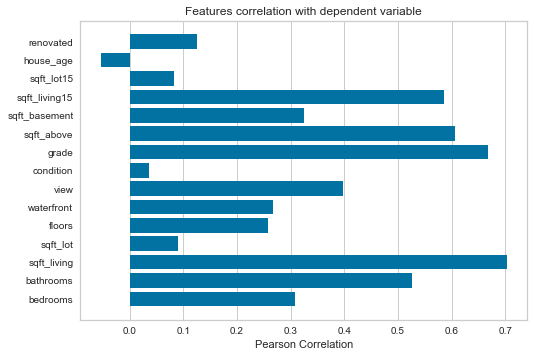

In [32]:
feature_names = list(features.columns)

visualizer = FeatureCorrelation(label=feature_names)

visualizer.fit(features, target)
visualizer.poof()

#### Selecting relevant features for Multiple regression using correlation

One way to select variables for our regression analysis is to pick those variables that are highly correlated with the target variable either positively or negatively.
Instead of doing this manually using correlation values, we will use the 'SelectKBest' object from sklearn library

'SelectKBest' allows us to apply specific statistical techniques to our x variables to find their strength of relationship with the target variable.

The f_regression and mutual_info_regression will apply these statistical techniques. We will use this to get the most relevant features for our multiple regression problem.

In [33]:
"""
The f_regression will calculate the correlation between every x variable and the corresponding y variable 
and in this case select the 5 most relevant features based on correlation
"""
select_univariate = SelectKBest(f_regression, k=5).fit(features, target)

# get the selected features
features_mask = select_univariate.get_support()

# True value indicate the features that were selected
features_mask

array([False,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False, False, False])

In [34]:
# To find the names of the selected features
selected_columns = features.columns[features_mask]
selected_columns

Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')

These are the features that will be used to perform regression analysis. Lets select these features in the features dataframe.

In [35]:
selected_features = features[selected_columns]
selected_features.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800


In [36]:
# Generating a quick statistical overview of the data we are working with
selected_features.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2.114757,2079.899736,7.656873,1788.390691,1986.552492
std,0.770163,918.440897,1.175459,828.090978,685.391304
min,0.000000,290.000000,1.000000,290.000000,399.000000
25%,1.750000,1427.000000,7.000000,1190.000000,1490.000000
50%,2.250000,1910.000000,7.000000,1560.000000,1840.000000
75%,2.500000,2550.000000,8.000000,2210.000000,2360.000000
max,8.000000,13540.000000,13.000000,9410.000000,6210.000000


We can see that the mean and standard deviation of our features are very different. 

Machine learning models do not work very well when the input features are at different scales. This is why it is very important to standarize your numerical data before feeding it into a machine learning model.

Lets standardize our selected_features dataframe.

In [37]:
x = pd.DataFrame(data=scale(selected_features), columns=selected_features.columns)
y = target

In [38]:
x.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-1.051951e-15,3.174253e-16,-2.328998e-15,3.892022e-16,-1.506632e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.745920e+00,-1.948891e+00,-5.663344e+00,-1.809494e+00,-2.316325e+00
25%,-4.736214e-01,-7.108948e-01,-5.588357e-01,-7.226314e-01,-7.244971e-01
50%,1.756067e-01,-1.849914e-01,-5.588357e-01,-2.758102e-01,-2.138280e-01
75%,5.002207e-01,5.118578e-01,2.919156e-01,5.091458e-01,5.448802e-01
max,7.641730e+00,1.247807e+01,4.545672e+00,9.204044e+00,6.162239e+00


From our standardized features dataframe we can see that the mean of all numeric variables are almost equal to zero and standard deviation almost equal to one.

We are now ready to perform multiple regression

In [39]:
# Spliting the data in train/test subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [40]:
# Instantiating the linear regression object
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# Making predictions using test data
y_pred = linear_regression.predict(x_test)

In [42]:
# Creating a new dataframe form our actual house prices and predicted house prices
df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
df.head()

,actual,predicted
4203,150000.0,-19869.545540
3702,385000.0,444954.944707
17456,565000.0,492409.584853
17190,450000.0,350659.805630
10666,653000.0,674151.618667


Lets now evaluate our regression model r-squared score.

We will calculate the r-squared score on both the training data as well as test data

In [43]:
score = linear_regression.score(x_train, y_train)
r2score = r2_score(y_test, y_pred)

print('score: {}'.format(score))
print ('r2_score: {}'.format(r2score))

score: 0.5431688266965096
r2_score: 0.5481544220539151


This seems like a fairly robust model. Its performance on during training data is not different from its perfomance on test data

Let's take a look at the coefficients and intercept of the regression model

In [44]:
# regression coefficients
linear_regression.coef_

array([-27066.65397658, 226264.00775671, 131593.10377351, -69971.02177825,
        17088.88742586])

In [45]:
# intercept
linear_regression.intercept_

541175.2769768231

###### Performing multiple regression Analytically using the statsmodel api
We can also perform multiple regression using analytical techniques using the statsmodel api.

In [46]:
# Adding a constant to our training data
x_train = sm.add_constant(x_train)

In [47]:
x_train.head()

,const,bathrooms,sqft_living,grade,sqft_above,sqft_living15
9157,1.0,0.175607,0.620740,0.291916,-0.215429,0.442746
1727,1.0,-0.149007,0.631629,1.142667,0.509146,0.982596
12315,1.0,1.149449,2.635070,1.142667,1.511474,2.266564
14480,1.0,-1.447464,-0.794734,-1.409587,-0.529411,0.457337
5397,1.0,-1.447464,-1.164936,-0.558836,-0.940004,-1.278938


In [48]:
# Performing multiple regression
mult_reg_model = sm.OLS(y_train, x_train).fit()

# Making prediction with the test data
y_pred = mult_reg_model.predict(x_train)

# Printing a summary of our multiple regression
print(mult_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     4110.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        05:08:52   Log-Likelihood:            -2.3926e+05
No. Observations:               17290   AIC:                         4.785e+05
Df Residuals:                   17284   BIC:                         4.786e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.412e+05   1882.949    287.408

Observations:
1. The adjusted r-squared is significant and very close to the r-squared value implying that each predictor we added was significant.
2. The regression itself is significant based on the f-statistic value and the corresponding p-value=0.00.
3. The coefficients and intercept obtained are equal to those obtained using machine learning.
4. Both the machine learning and analytic techniques yielded the same regression model

#### Selecting relevant features for Multiple regression using Mutual Information
Instead of using correlation to select the most relevant features for our multiple regression, let's use another statistical technique
We will use 'mutual_info_regression' function instead of 'f_regression' function as above.

The 'mutual_info_regression' uses the mutual information between an x variable and the target value to select the most relevant features.

In probability and information theory, the mutual information of two random variables is the measure of mutual dependence between the two variables. It quantifies the amount of information obtained about one variable through observing the other random variable

In [ ]:
select_univariate = SelectKBest(mutual_info_regression, k=5).fit(features, target)

# get selected features
selected_columns_mask = select_univariate.get_support()

selected_columns_mask